# Semana 09 - Aprendizado de Máquina

Muito se imagina que a ciência de dados se resume ao aprendizado de máquina e que os cientistas de dados constroem, treinam e ajustam modelos desta classe o dia todo. Na verdade, a ciência de dados está transformando problemas de negócios em problemas de dados. Coletando, entendendo, limpando e formatando dados. Por fim, vem o aprendizado de máquina. Ainda assim, é um passo interessante e essencial que você precisa saber para aplicar a ciência de dados.

##Modelagem

Antes de falarmos sobre aprendizado de máquina, precisamos falar sobre `modelos`. O que é um modelo? É simplesmente uma especificação de uma relação matemática (ou probabilística) que existe entre diferentes variáveis.


##O que é Aprendizado de Máquina?

Embora exista muitas definições, usaremos o termo **aprendizado de máquina** para nos referir à criação e uso de modelos que são aprendidos a partir de dados. Em outros contextos, isso pode ser chamado de modelagem preditiva. Normalmente, nosso objetivo será usar dados existentes para desenvolver modelos que possamos usar para prever (ou predizer) resultados para novos dados, tais como:

*   Se um e-mail é spam;
*   Se uma transação com cartão de crédito é fraudulenta;
*   Em qual anúncio um comprador provavelmente clicará;
*   Qual time de futebol vai ganhar o campeonato.

##Sobreajuste e Subajuste

Um perigo comum no aprendizado de máquina é o **sobreajuste**:
*  produzir um modelo que funciona bem nos dados em que você o treina, mas generaliza mal para novos dados.

Por outro lado, temos o **subajuste**:
*  produzir um modelo que não funciona bem nem nos dados de treinamento.

Claramente, modelos muito complexos levam ao sobreajuste e não generalizam muito além dos dados em que foram treinados. Então, como podemos garantir que nossos modelos não sejam muito complexos? A abordagem mais fundamental envolve o uso de dados diferentes para treinar o modelo e testá-lo. Vamos aprender a fazer isso utilizando a base de dados de uma fábrica de sorvetes que contém informações sobre a temperatura média e a receita obtida:

In [ ]:
import pandas as pd

# importando dados
vendas = pd.read_csv("/content/Dados_Sorvete.csv")
vendas

,Temperatura,Receita
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [ ]:
# matriz de correlacao
vendas.corr()

,Temperatura,Receita
Temperatura,1.000000,0.989802
Receita,0.989802,1.000000


array([[<Axes: xlabel='Temperatura', ylabel='Temperatura'>,
        <Axes: xlabel='Receita', ylabel='Temperatura'>],
       [<Axes: xlabel='Temperatura', ylabel='Receita'>,
        <Axes: xlabel='Receita', ylabel='Receita'>]], dtype=object)

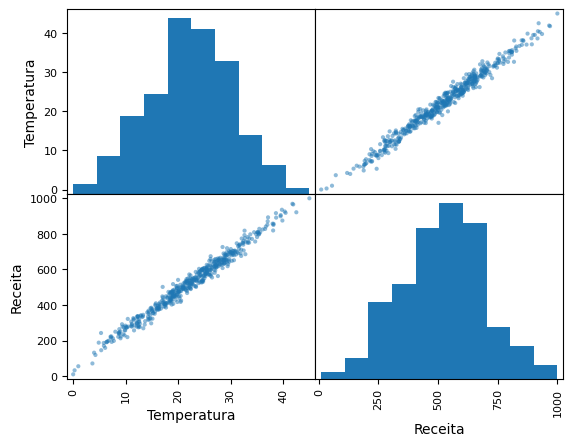

In [ ]:
# matriz de dispersao
pd.plotting.scatter_matrix(vendas)

A maneira mais simples de evitar o sobreajuste é separar o conjunto de dados de forma aleatória, de modo que (por exemplo) 80% dele sejam usados para treinar o modelo e o restante sirva como um teste de desempenho. Chamaremos esses conjuntos, respectivamente, de `treino` e `teste`:

In [ ]:
from sklearn.model_selection import train_test_split

# definindo conjunto de treino e teste simultaneamente
# aqui, o conjunto de treino sera 80% dos dados
treino, teste = train_test_split(vendas, test_size = 0.80)

In [ ]:
print(treino.shape)   # (100, 2)
print(teste.shape)    # (400, 2)
print(vendas.shape)   # (500, 2)

(100, 2)
(400, 2)
(500, 2)


In [ ]:
# Estatisticas da amostra de treino:
treino.describe()

,Temperatura,Receita
count,100.000000,100.000000
mean,22.129578,523.501978
std,8.707558,187.668594
min,0.000000,10.000000
25%,16.399409,388.321000
50%,22.254836,522.449996
75%,27.981041,646.752709
max,41.924446,969.291630


In [ ]:
# Refazendo:
treino, teste = train_test_split(vendas, test_size = 0.80)
treino.describe()  # Note que os valores mudaram
                   # Os dados sao separados de forma aleatoria!

,Temperatura,Receita
count,100.000000,100.000000
mean,22.127274,524.808714
std,8.364824,182.008136
min,0.976870,55.390338
25%,16.602920,402.199745
50%,21.979662,519.162023
75%,27.699105,652.500740
max,41.766589,969.291630


> Note que a cada vez que você realizar esse procedimento, uma amostra diferente será obtida. Essa é a melhor forma de evitar com que sua seleção induza determinados resultados.

Muitas vezes, teremos variáveis de entrada (que são chamadas de `input` ou simbolizadas pela letra `X`) e variáveis de saída (que são chamadas de `output` ou simbolizadas pela letra `y`) pareadas. Nesse caso, precisamos colocar os valores correspondentes juntos nos dados de treinamento e teste. No nosso exemplo, seria interessante predizer a receita da empresa (`y`) utilizando a temperatura média (`X`), então:

In [ ]:
# teste - input
X_teste = teste["Temperatura"]
# teste - output
y_teste = teste["Receita"]

In [ ]:
# treino - input
X_treino = treino["Temperatura"]
# treino - output
y_treino = treino["Receita"]

Feito isso, veremos nos próximos capítulos que aplicaremos modelos da seguinte forma genérica:

In [ ]:
# NAO RODE!

# Isso e somente um esquema geral
# modelo = AlgumModelo()
# treinamento.modelo(X_treino, y_treino)
# performance = teste.modelo(X_teste, y_teste)

Se o modelo foi superajustado aos dados de treinamento, esperamos que ele tenha um desempenho muito ruim nos dados de teste. Em outras palavras, se ele tiver um bom desempenho nos dados de teste, você poderá ter mais confiança de que está se ajustando bem.

##Perfomance

Como medir o quão bom é um modelo? Suponha um modelo de classificação binária (por exemplo, *sim* ou *não*).

Dado um conjunto de dados rotulados e um modelo preditivo de classificação, cada dado está em uma das quatro categorias:

*   Verdadeiro positivo: Esta mensagem é um *spam* e previmos corretamente como *spam*;

*   Falso positivo (erro tipo 1): Esta mensagem não é um *spam*, mas previmos como *spam*;

*   Falso negativo (erro tipo 2): Esta mensagem é um *spam*, mas previmos que não era um *spam*;

*   Verdadeiro negativo: `Esta mensagem não é um *spam* e previmos corretamente que não é um *spam*.

Um experimento realizado por uma grande empresa de servidores *online* avaliou 1 milhão de e-mails em busca de classificar quais deles eram *spams* através de modelos de classificação.

Podemos então usá-la para calcular várias estatísticas sobre o desempenho do modelo. Por exemplo, a **acurácia** é definida como a fração de previsões corretas:

In [ ]:
import pandas as pd

In [ ]:
# Matriz de confusao
mat_confusao = pd.DataFrame(data =
                            {'vp': [70], # verdadeiro positivo
                             'fp': [4930], # falso positivo
                             'fn': [13930], # falso negativo
                             'vn': [986000]} # verdadeiro negativo
                            )

mat_confusao

,vp,fp,fn,vn
0,70,4930,13930,986000


In [ ]:
# Funcao que calcula a acuracia
def acuracia(matriz):
  correto = matriz["vp"] + matriz["vn"]
  total = matriz["vp"] + matriz["fp"] + matriz["fn"] + matriz["vn"]
  return (correto / total)[0]

# Acuracia
acuracia(mat_confusao)   # 0.981

0.9812325236583642

> Esse parece ser um número bastante impressionante. Mas com uma olhada mais atenta à tabela, não deveríamos dar muito crédito à precisão bruta (Por que?).

É comum observar a combinação de **precisão** e **sensibilidade**. A precisão mede quão acurada as previsões *positivas* foram:

In [ ]:
# Funcao que calcula a precisao
def precisao(matriz):
  return (matriz["vp"] / (matriz["vp"] + matriz["fp"]))[0]

# Precisao
precisao(mat_confusao)   # 0.014

0.014

E a sensibilidade mede qual fração dos *positivos* nosso modelo identificou:

In [ ]:
# Funcao que calcula a sensibilidade
def sensibilidade(matriz):
    return (matriz["vp"] / (matriz["vp"] + matriz["fn"]))[0]

# Sensibilidade
sensibilidade(mat_confusao)   # 0.005

0.005

> Ambos são números terríveis, refletindo que **este é um modelo ruim**.

Às vezes, precisão e sensibilidade são combinados no *escore F1*, que é definido como:

In [ ]:
# Funcao que calcula o escore F1
def escore_f1(matriz):
    p = precisao(matriz)
    s = sensibilidade(matriz)
    return 2 * p * s / (p + s)

# Escore F1
escore_f1(mat_confusao)   # 0.007

0.00736842105263158

> Esta é a *média harmônica* de precisão e sensibilidade (e necessariamente está entre elas).

Normalmente, a escolha de um *bom* modelo envolve um equilíbrio entre precisão e sensibilidade.
*    Predizer *sim* com muita frequência acarretará em muitos falsos positivos;
*    Predizer *não* com muita frequência acarretará em muitos falsos negativos.

> Na vida real, cada caso é um caso. E se faz necessário identificar qual a melhor medida de performance para o modelo aplicado.